In [1]:
#pip install wordcloud

In [2]:
import json
import pandas as pd
import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS as stopwords_wc

In [3]:
pd.set_option('display.max_colwidth', 100)

In [4]:
# Read the csv files containin gthe tweets by Eon Musk from 2010 to 2022.
df_2010 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2010.csv')
df_2011 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2011.csv')
df_2012 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2012.csv')
df_2013 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2013.csv')
df_2014 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2014.csv')
df_2015 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2015.csv')
df_2016 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2016.csv')
df_2017 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2017.csv')
df_2018 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2018.csv')
df_2019 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2019.csv')
df_2020 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2020.csv')
df_2021 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2021.csv')
df_2022 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2022.csv')

In [5]:
print(f"shape of 2010 df: " + str(df_2010.shape))
print(f"shape of 2011 df: " + str(df_2012.shape))
print(f"shape of 2012 df: " + str(df_2012.shape))
print(f"shape of 2013 df: " + str(df_2013.shape))
print(f"shape of 2014 df: " + str(df_2014.shape))
print(f"shape of 2015 df: " + str(df_2015.shape))
print(f"shape of 2016 df: " + str(df_2016.shape))
print(f"shape of 2017 df: " + str(df_2017.shape))
print(f"shape of 2018 df: " + str(df_2018.shape))
print(f"shape of 2019 df: " + str(df_2019.shape))
print(f"shape of 2020 df: " + str(df_2020.shape))
print(f"shape of 2021 df: " + str(df_2021.shape))
print(f"shape of 2022 df: " + str(df_2022.shape))

shape of 2010 df: (1, 39)
shape of 2011 df: (313, 39)
shape of 2012 df: (313, 39)
shape of 2013 df: (737, 39)
shape of 2014 df: (923, 39)
shape of 2015 df: (1253, 39)
shape of 2016 df: (2000, 39)
shape of 2017 df: (3167, 39)
shape of 2018 df: (2285, 39)
shape of 2019 df: (8312, 39)
shape of 2020 df: (11717, 39)
shape of 2021 df: (3115, 36)
shape of 2022 df: (1028, 36)


### From the above o/p I see that all the dataframes have the same number of columns (39) except for 2021 and 2022 (36). 

In [6]:
# Rename and make all columns with same names

df_2010 = df_2010[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2011 = df_2011[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2012 = df_2012[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2013 = df_2013[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2014 = df_2014[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2015 = df_2015[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2016 = df_2016[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2017 = df_2017[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2018 = df_2018[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2019 = df_2019[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2020 = df_2020[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2021 = df_2021[['id','date','tweet','replies_count','likes_count','retweets_count']]
df_2022 = df_2022[['id','date','tweet','replies_count','likes_count','retweets_count']]

df_2021.rename(columns = {'replies_count':'nreplies', 'likes_count':'nlikes','retweets_count':'nretweets'}, inplace = True)
df_2022.rename(columns = {'replies_count':'nreplies', 'likes_count':'nlikes','retweets_count':'nretweets'}, inplace = True)

In [7]:
df_2010.columns

Index(['id', 'date', 'tweet', 'nreplies', 'nlikes', 'nretweets'], dtype='object')

In [8]:
df_2022.columns

Index(['id', 'date', 'tweet', 'nreplies', 'nlikes', 'nretweets'], dtype='object')

In [9]:
df_tweets = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022],axis = 0)

In [10]:
df_tweets.shape

(34878, 6)

In [11]:
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets['date']

0      2010-06-04 18:31:57
0      2011-12-28 22:27:08
1      2011-12-27 23:38:55
2      2011-12-26 16:29:50
3      2011-12-26 16:23:04
               ...        
1023   2022-01-03 00:00:00
1024   2022-01-02 00:00:00
1025   2022-01-02 00:00:00
1026   2022-01-01 00:00:00
1027   2022-01-01 00:00:00
Name: date, Length: 34878, dtype: datetime64[ns]

In [12]:
df_tweets['date'] = df_tweets['date'] - datetime.timedelta(hours=6)
df_tweets['date']

0      2010-06-04 12:31:57
0      2011-12-28 16:27:08
1      2011-12-27 17:38:55
2      2011-12-26 10:29:50
3      2011-12-26 10:23:04
               ...        
1023   2022-01-02 18:00:00
1024   2022-01-01 18:00:00
1025   2022-01-01 18:00:00
1026   2021-12-31 18:00:00
1027   2021-12-31 18:00:00
Name: date, Length: 34878, dtype: datetime64[ns]

In [13]:
df_tweets.head()

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04 12:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391,4652,348
0,152153637639028736,2011-12-28 16:27:08,@TheOnion So true :),7,12,1
1,151809315026636800,2011-12-27 17:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,13,39,34
2,151338939389706242,2011-12-26 10:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,9,155,18
3,151337237429239808,2011-12-26 10:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",15,158,13


In [14]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 1027
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         34878 non-null  int64         
 1   date       34878 non-null  datetime64[ns]
 2   tweet      34878 non-null  object        
 3   nreplies   34878 non-null  int64         
 4   nlikes     34878 non-null  int64         
 5   nretweets  34878 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.9+ MB


In [15]:
df_elon_tweets = pd.read_csv('../../Tamara/elon_tweets_4.csv')
df_elon_tweets.columns

Index(['Unnamed: 0', 'tweetID', 'date', 'fullText', 'likesCount',
       'retweetCount'],
      dtype='object')

In [16]:
df_elon_tweets = df_elon_tweets.loc[df_elon_tweets['date']>='2022-03-05']

In [17]:
df_elon_tweets['date'] = pd.to_datetime(df_elon_tweets['date'])
df_elon_tweets['date']

0      2022-07-27 16:11:18+00:00
1      2022-07-27 16:07:30+00:00
2      2022-07-27 15:40:27+00:00
3      2022-07-27 15:38:48+00:00
4      2022-07-27 15:32:22+00:00
                  ...           
1795   2022-03-05 03:19:13+00:00
1796   2022-03-05 01:22:00+00:00
1797   2022-03-05 01:21:07+00:00
1798   2022-03-05 00:48:59+00:00
1799   2022-03-05 00:40:01+00:00
Name: date, Length: 1800, dtype: datetime64[ns, UTC]

In [18]:
df_elon_tweets['date'] = df_elon_tweets['date'] - datetime.timedelta(hours=6)
df_elon_tweets['date']

0      2022-07-27 10:11:18+00:00
1      2022-07-27 10:07:30+00:00
2      2022-07-27 09:40:27+00:00
3      2022-07-27 09:38:48+00:00
4      2022-07-27 09:32:22+00:00
                  ...           
1795   2022-03-04 21:19:13+00:00
1796   2022-03-04 19:22:00+00:00
1797   2022-03-04 19:21:07+00:00
1798   2022-03-04 18:48:59+00:00
1799   2022-03-04 18:40:01+00:00
Name: date, Length: 1800, dtype: datetime64[ns, UTC]

In [19]:
df_elon_tweets['date'] = df_elon_tweets['date'].dt.date

In [20]:
df_elon_tweets=df_elon_tweets.drop(df_elon_tweets.columns[0], axis=1)

In [21]:
df_elon_tweets.rename(columns = {'tweetID':'id','fullText':'tweet','likesCount':'nlikes','retweetCounts':'nretweets'}, inplace = True)
df_elon_tweets

,id,date,tweet,nlikes,retweetCount
0,1552325766213427202,2022-07-27,@NASASpaceflight Sub lightspeed is all that’s needed to be interstellar. Intergalactic is tough.,5008,329
1,1552324811153707018,2022-07-27,The media is a click-seeking machine dressed up as a truth-seeking machine,148010,19057
2,1552318004343488514,2022-07-27,This is compatible with existing religions – surely God would want us to see Creation?,37834,2405
3,1552317587694010368,2022-07-27,A new philosophy of the future is needed. I believe it should be curiosity about the Universe – ...,70135,7325
4,1552315971079180290,2022-07-27,@sama A new philosophy of the future is needed,2581,179
...,...,...,...,...,...
1795,1499947614497906696,2022-03-04,@GailAlfarATX Exactly,5092,171
1796,1499918115018313728,2022-03-04,"And also my sympathies to the great people of Russia, who do not want this",333748,18128
1797,1499917894767063043,2022-03-04,🇺🇦🇺🇦🇺🇦 Hold Strong Ukraine 🇺🇦🇺🇦🇺🇦,554107,54119
1798,1499909806504779779,2022-03-04,"Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot re...",207276,21062


In [22]:
df_tweets

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04 12:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391,4652,348
0,152153637639028736,2011-12-28 16:27:08,@TheOnion So true :),7,12,1
1,151809315026636800,2011-12-27 17:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,13,39,34
2,151338939389706242,2011-12-26 10:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,9,155,18
3,151337237429239808,2011-12-26 10:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",15,158,13
...,...,...,...,...,...,...
1023,1477775713172402176,2022-01-02 18:00:00,https://t.co/LA9hPzVlGx,25611,473530,51383
1024,1477706142461706248,2022-01-01 18:00:00,Let’s make the roaring 20’s happen!,22500,320201,26951
1025,1477700424933253123,2022-01-01 18:00:00,Great work by Tesla team worldwide!,5630,66405,4459
1026,1477096955658579974,2021-12-31 18:00:00,@BLKMDL3 @Tesla 🔥,1074,45704,472


In [23]:
df_tweets_new = pd.concat([df_tweets,df_elon_tweets],axis=0)

df_tweets_new.shape

(36678, 7)

In [24]:
df_tweets_new['id'] = df_tweets_new['id'].map(str)

In [25]:
# df_tweets_new.dtypes

In [26]:
# # ensuring time is in datetime format
# df_tweets_new['date'] = pd.to_datetime(df_tweets_new['date'])


In [27]:
#converting time from UTC to CST

#df_tweets_new['date'] = df_tweets_new['date'] - datetime.timedelta(hours=6)

In [28]:
#Convert the date column from string to "datetime" column. extracting just the date.

df_tweets_new['date'] = pd.to_datetime(df_tweets_new['date']).dt.date
df_tweets_new.head()

,id,date,tweet,nreplies,nlikes,nretweets,retweetCount
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
0,152153637639028736,2011-12-28,@TheOnion So true :),7.0,12,1.0,NaN
1,151809315026636800,2011-12-27,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,13.0,39,34.0,NaN
2,151338939389706242,2011-12-26,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,9.0,155,18.0,NaN
3,151337237429239808,2011-12-26,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",15.0,158,13.0,NaN


In [29]:
df_tweets_new.shape

(36678, 7)

In [30]:
# Let us sort the dates in ascending order.
df_tweets_new.sort_values(by=['date'], inplace=True, ascending=True)
df_tweets_new.reset_index(drop=True, inplace=True)
df_tweets_new.head(20)

,id,date,tweet,nreplies,nlikes,nretweets,retweetCount
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
1,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
2,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
3,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
4,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
5,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
6,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
7,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
8,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
9,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN


#### After sorting the records in ascending order, we see a lot of duplicate records. These duplicate records need to be removed.

In [31]:
#Checking for duplicate records
df_tweets_new[df_tweets_new.duplicated(keep='first')][:10]

,id,date,tweet,nreplies,nlikes,nretweets,retweetCount
1,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
2,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
3,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
4,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
5,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
6,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
7,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
8,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
9,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
12,142188458125963264,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a m...,31.0,78,9.0,NaN


In [32]:
#Drop duplicate records from the dataframe and reset the index
df_tweets_final = df_tweets_new.drop_duplicates(keep='first')
df_tweets_final.reset_index(drop=True, inplace=True)
df_tweets_final.head(15)

,id,date,tweet,nreplies,nlikes,nretweets,retweetCount
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
1,142188458125963264,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a m...,31.0,78,9.0,NaN
2,142179928203460608,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys...",32.0,189,15.0,NaN
3,143171132814671872,2011-12-03,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,17.0,65,9.0,NaN
4,142881284019060736,2011-12-03,That was a total non sequitur btw,31.0,53,6.0,NaN
5,142880871391838208,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replie...",7.0,29,25.0,NaN
6,149435658115612672,2011-12-21,"Read ""Lying"", the new book by my friend Sam Harris. Excellent cover art and lots of good reason...",12.0,60,13.0,NaN
7,149447517325635584,2011-12-21,"Yeah, this really is me, as my Mom @mayemusk will attest. Not sure I can handle just doing 140 c...",11.0,34,4.0,NaN
8,149444078210256896,2011-12-21,"Got called randomly by Kanye West today and received a download of his thoughts, ranging from sh...",19.0,1068,546.0,NaN
9,149441101684686848,2011-12-21,His singing and acting talent will be sorely missed: http://t.co/IIFKob75 South Park sequel co...,6.0,32,2.0,NaN


In [33]:
print(df_tweets_final.shape)

(19679, 7)


#### After dropping the duplicate records we see that only half of the records remain. Let us no clean the tweets, ie remove all the #,@ symbols. 

In [34]:
#Lets clean the tweets (remove @'s' and urls and)
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in df_tweets_final.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    new.append(t)
    
df_tweets_final['tweet'] = new
df_tweets_final

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2675060673.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_final['tweet'] = new


,id,date,tweet,nreplies,nlikes,nretweets,retweetCount
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348.0,NaN
1,142188458125963264,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,31.0,78,9.0,NaN
2,142179928203460608,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys....",32.0,189,15.0,NaN
3,143171132814671872,2011-12-03,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,17.0,65,9.0,NaN
4,142881284019060736,2011-12-03,That was a total non sequitur btw,31.0,53,6.0,NaN
...,...,...,...,...,...,...,...
19674,1552315971079180290,2022-07-27,A new philosophy of the future is needed,NaN,2581,NaN,179.0
19675,1552317587694010368,2022-07-27,A new philosophy of the future is needed. I believe it should be curiosity about the Universe – ...,NaN,70135,NaN,7325.0
19676,1552318004343488514,2022-07-27,This is compatible with existing religions – surely God would want us to see Creation?,NaN,37834,NaN,2405.0
19677,1552324811153707018,2022-07-27,The media is a click-seeking machine dressed up as a truth-seeking machine,NaN,148010,NaN,19057.0


In [35]:
pd.DatetimeIndex(df_tweets_final["date"]).year

Int64Index([2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='date', length=19679)

### Visualize the number of tweets from 2010 to 2022 of Elon Musk

In [36]:
# Get the number of tweets every year by Elon Musk
date_count_df = df_tweets_final.groupby(pd.DatetimeIndex(df_tweets_final["date"]).year)["tweet"].count()
date_count_df = date_count_df.to_frame()
date_count_df

,tweet
date,
2010,1
2011,42
2012,272
2013,422
2014,188
2015,329
2016,753
2017,1170
2018,4582


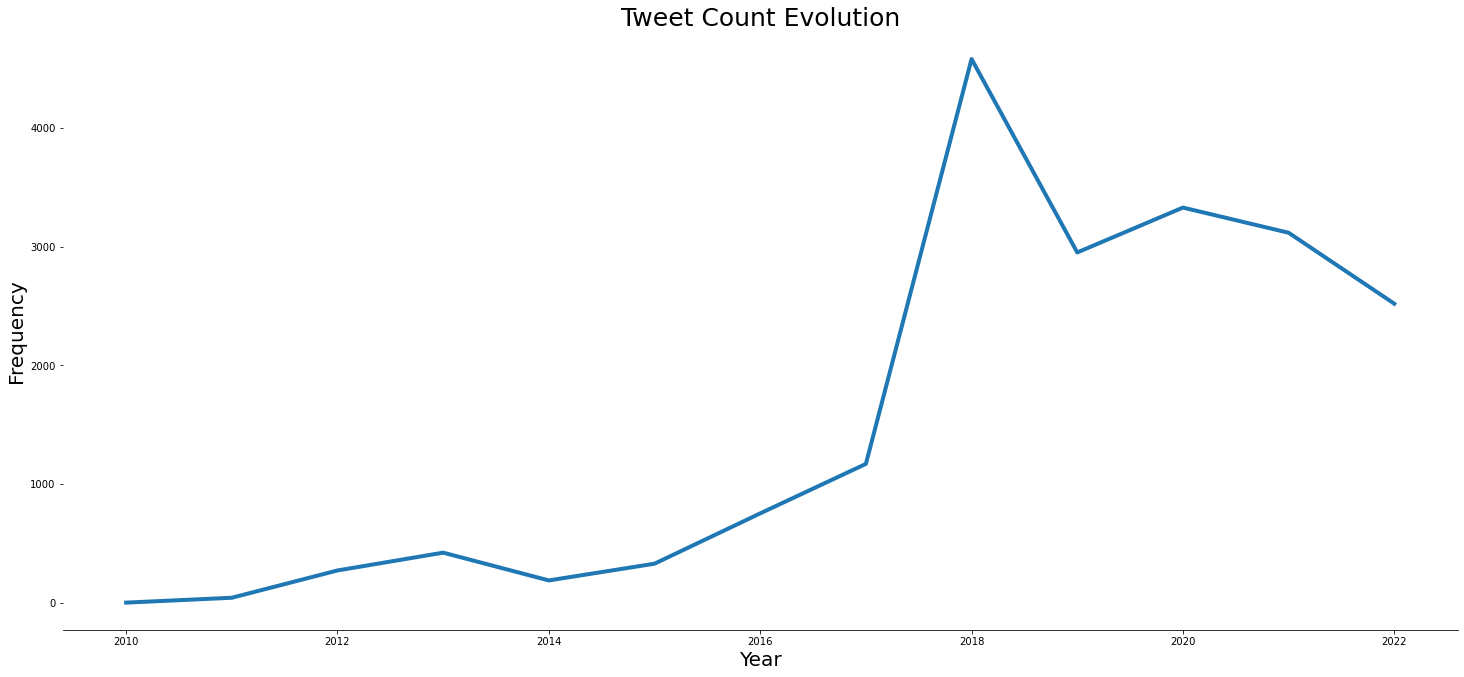

In [37]:
# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x= "date", y= "tweet", lw=4)
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True)

### The number of tweets by Elon Musk kept increasing every year from 2010. Maximum number of tweets were generated in year 2018.

In [38]:
#Filter the dogecoin tweets from the df_tweets_new dataset
def filterTweetData(financialType=''):
    df = pd.DataFrame(columns = ['Date', 'Tweet'])

    for i in range(len(df_tweets_final)):
        cur = df_tweets_final.loc[i].tweet
        cur = cur.lower()
        if financialType in cur:
            df = df.append({'id' :df_tweets_final.loc[i].id,
                            'Date' : df_tweets_final.loc[i].date, 
                            'Tweet' : df_tweets_final.loc[i].tweet, 
                            'nlikes':df_tweets_final.loc[i].nlikes,
                            'nreplies':df_tweets_final.loc[i].nreplies,
                            'nretweets':df_tweets_final.loc[i].nretweets
                                     },
                    ignore_index = True)

    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df
    return df

### Filter the tweets containing the word "doge"

In [39]:
df_doge = filterTweetData('doge')

In [40]:
df_doge

,Date,Tweet,id,nlikes,nreplies,nretweets
0,2019-04-02,Dogecoin value may vary,1113178951403180032,20160.0,1080.0,1959.0
1,2019-04-02,Dogecoin rulz,1113173498384441344,138893.0,1732.0,16539.0
2,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,1113009339743100929,9063.0,558.0,2428.0
3,2020-04-25,Dogecoin Mode,1254039929333649409,2192.0,124.0,207.0
4,2020-07-17,"Excuse me, I only sell Doge!",1284290215561986048,15930.0,416.0,775.0
...,...,...,...,...,...,...
71,2022-05-27,"Tesla merch can be bought with Doge, soon SpaceX merch too",1530209049261658112,203072.0,NaN,NaN
72,2022-05-31,You’re humble bro. Billy’s sense of humor &amp; irreverence is a big part of why people love Dog...,1531699416490557440,12148.0,NaN,NaN
73,2022-05-31,And Palmer always forgets to mention that he never wrote a single line of Dogecoin code …,1531696049064116225,3650.0,NaN,NaN
74,2022-06-19,I will keep supporting Dogecoin,1538406040374595585,396094.0,NaN,NaN


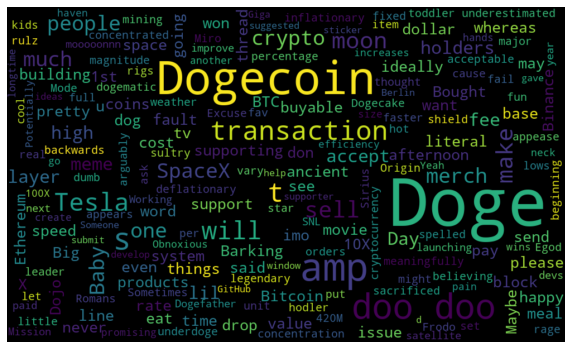

In [41]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_doge["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [42]:
# Get the number of tweets every year by Elon Musk
date_doge_df = df_doge.groupby(pd.DatetimeIndex(df_doge["Date"]).year)["Tweet"].count()
date_doge_df = date_doge_df.to_frame()
date_doge_df

,Tweet
Date,
2019,3
2020,4
2021,58
2022,11


Text(0, 0.5, 'Frequency')

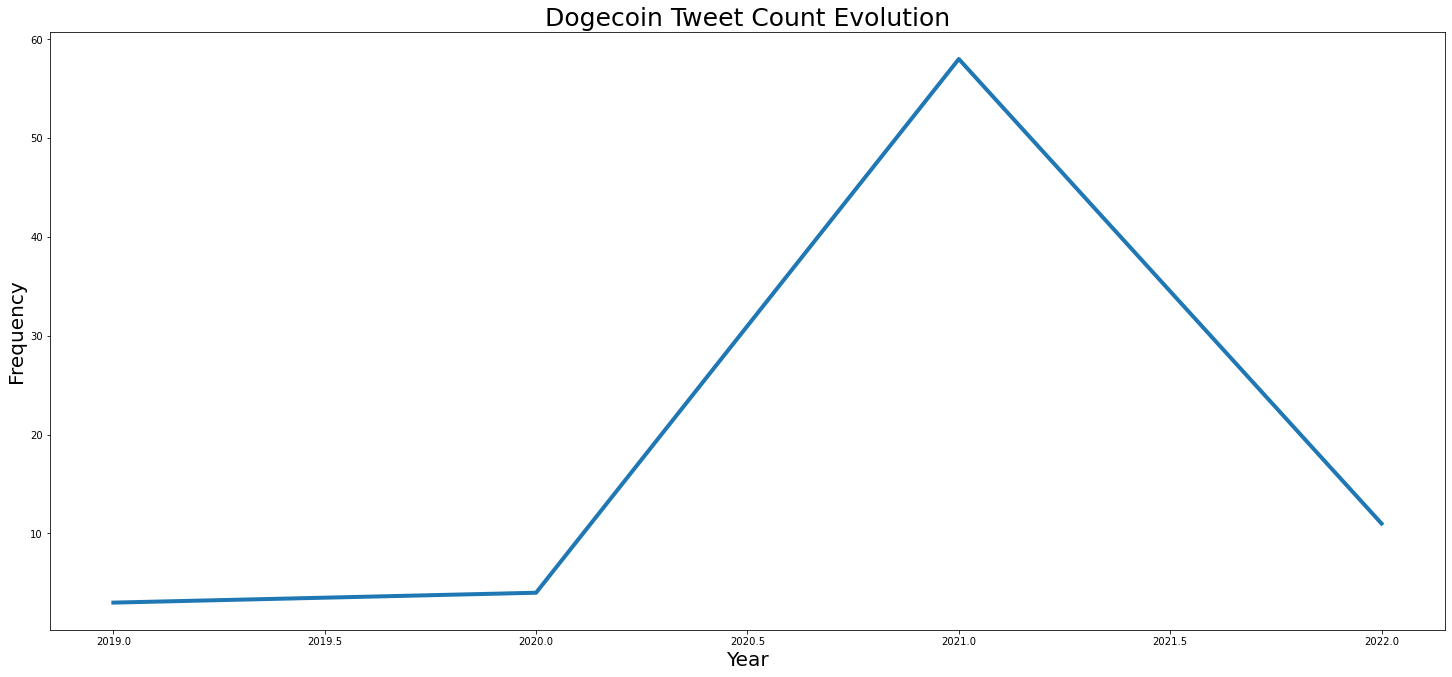

In [43]:
# Plot the number of tweets for dogecoing by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_doge_df, x= "Date", y= "Tweet", lw=4)
plt.title("Dogecoin Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
# sns.despine(left=True)

### Filter the tweets containing the word "tesla"

In [44]:
df_tesla = filterTweetData('tesla')

In [45]:
df_tesla

,Date,Tweet,id,nlikes,nreplies,nretweets
0,2011-12-31,Hacked my Tesla charge connector on a small island in the rain last night #whatcouldpossiblygowrong,153099684280410112,405.0,55.0,32.0
1,2012-01-10,"The exec conf room at Tesla used to be called Denali, but I decided to move a few letters around...",156927468836630528,315.0,32.0,67.0
2,2012-01-12,"A Tesla Roadster just passed the 100,000 mile mark for the first time and still has over 200 mil...",157700726515183616,15.0,5.0,51.0
3,2012-01-17,That's not just paranoia (a healthy trait at times). Tesla really is under massive attack by sho...,159396536621596672,16.0,23.0,14.0
4,2012-01-17,Will communicate better in the future. Too many people want us to fail and are willing to twist ...,159330976378519552,163.0,44.0,43.0
...,...,...,...,...,...,...
1571,2022-07-19,Congrats to Tesla Fremont + Giga Nevada for making their 2 millionth car!,1549422655656275968,113889.0,NaN,NaN
1572,2022-07-19,Please vote your shares with Tesla!,1549288086944845825,34346.0,NaN,NaN
1573,2022-07-23,Excited to work with Tesla Service to enable same-hour service as often as possible! Applying Fo...,1550816088300179459,109148.0,NaN,NaN
1574,2022-07-24,"WSJ has run so many bs hit pieces on me and Tesla I’ve lost count! It’s embarrassing for them, f...",1551392795545333760,26821.0,NaN,NaN


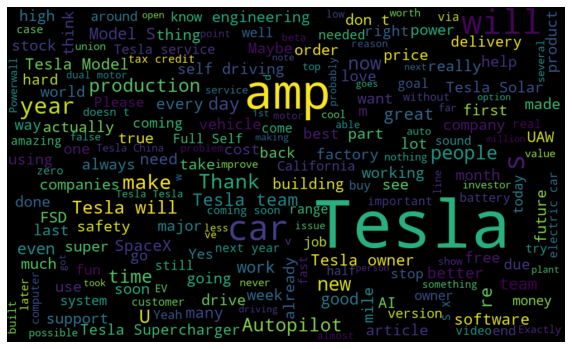

In [46]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_tesla["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [47]:
# Get the number of tweets every year by Elon Musk
date_tesla_df = df_tesla.groupby(pd.DatetimeIndex(df_tesla["Date"]).year)["Tweet"].count()
date_tesla_df = date_tesla_df.to_frame()
date_tesla_df

,Tweet
Date,
2011,1
2012,30
2013,69
2014,29
2015,25
2016,80
2017,71
2018,505
2019,246


Text(0, 0.5, 'Frequency')

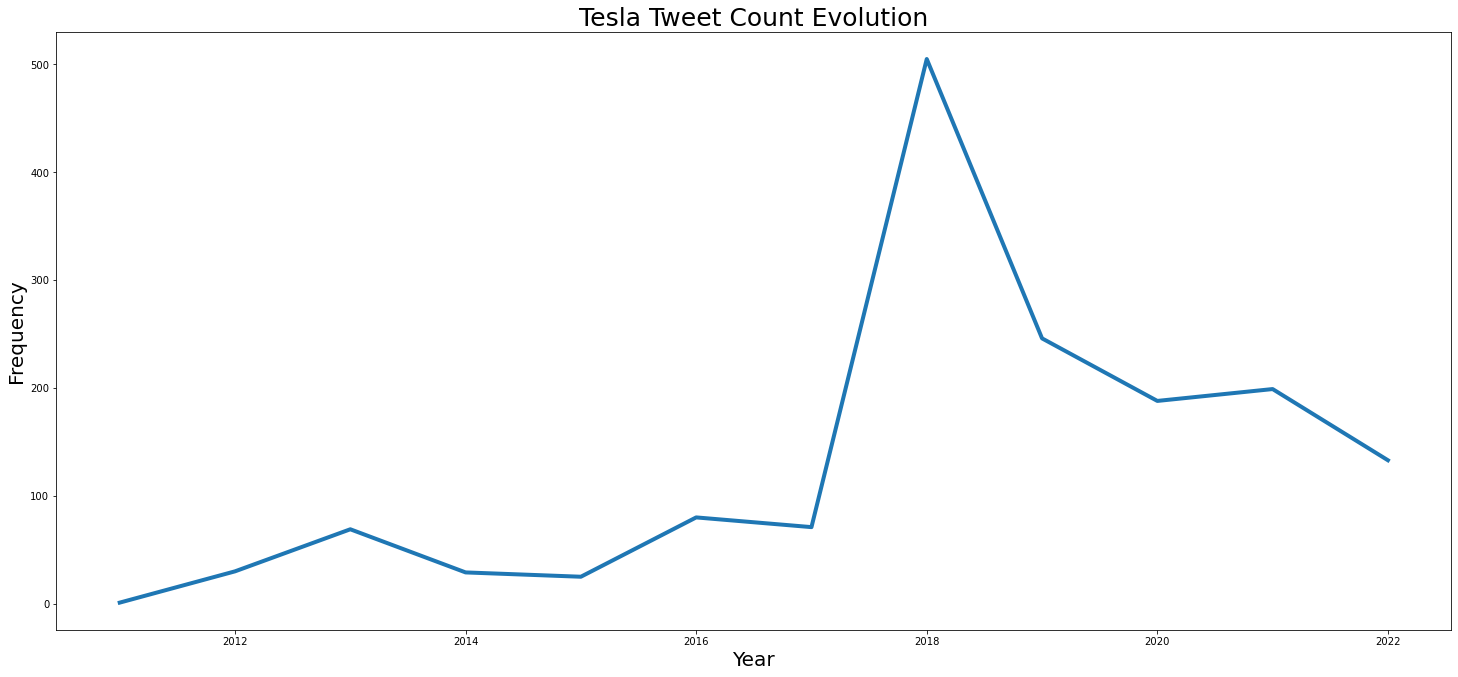

In [48]:
# Plot the number of tweets for spaceX by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_tesla_df, x= "Date", y= "Tweet", lw=4)
plt.title("Tesla Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

In [49]:
df_twitter = filterTweetData('twitter')

In [50]:
df_twitter

,Date,Tweet,id,nlikes,nreplies,nretweets
0,2015-05-22,What are the best riddles you've heard that are short enough for Twitter?,601669073441697792,599.0,638.0,208.0
1,2016-04-03,"Signing off from impromptu Twitter AMA. Thanks for the suggestions. Btw, we really will have mor...",716780425939521538,3252.0,241.0,367.0
2,2016-07-05,Exactly! I love Twitter.,750354728169644032,328.0,13.0,41.0
3,2016-10-04,I use twitter for news orgs. My Insta has same women as men. What's up with the phoney PC police...,783347230245736448,5254.0,312.0,1598.0
4,2016-10-05,"Yeah, and several others at various times. My twitter list is trimmed down to almost all news/co...",783842202220802048,225.0,20.0,16.0
...,...,...,...,...,...,...
152,2022-05-31,My kids wrote better code when they were 12 than the nonsense script Jackson sent me. Like I sai...,1531632887866576904,7498.0,NaN,NaN
153,2022-06-09,Only Twitter,1534938078279880706,57122.0,NaN,NaN
154,2022-06-18,To answer the question: Why Twitter?,1538208757905297409,47711.0,NaN,NaN
155,2022-06-21,Twitter me &amp; real-life me are quite different haha!,1539292625433501702,147001.0,NaN,NaN


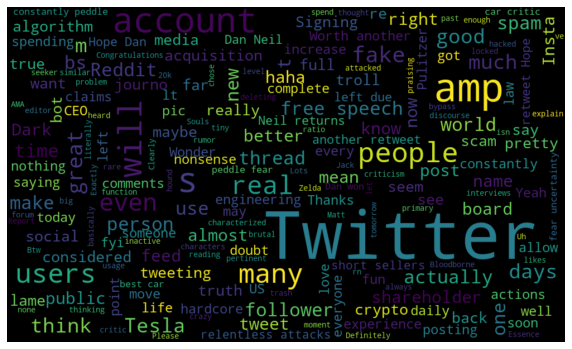

In [51]:
plt.figure(figsize=(10,8))
stopwords_wc = set(stopwords_wc)
allWords = ' '.join([twts for twts in df_twitter["Tweet"]])
wordCloud = WordCloud(stopwords=stopwords_wc, width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [52]:
# Get the number of tweets every year by Elon Musk
date_twitter_df = df_twitter.groupby(pd.DatetimeIndex(df_twitter["Date"]).year)["Tweet"].count()
date_twitter_df = date_twitter_df.to_frame()
date_twitter_df

,Tweet
Date,
2015,1
2016,4
2017,4
2018,43
2019,10
2020,15
2021,6
2022,74


Text(0, 0.5, 'Frequency')

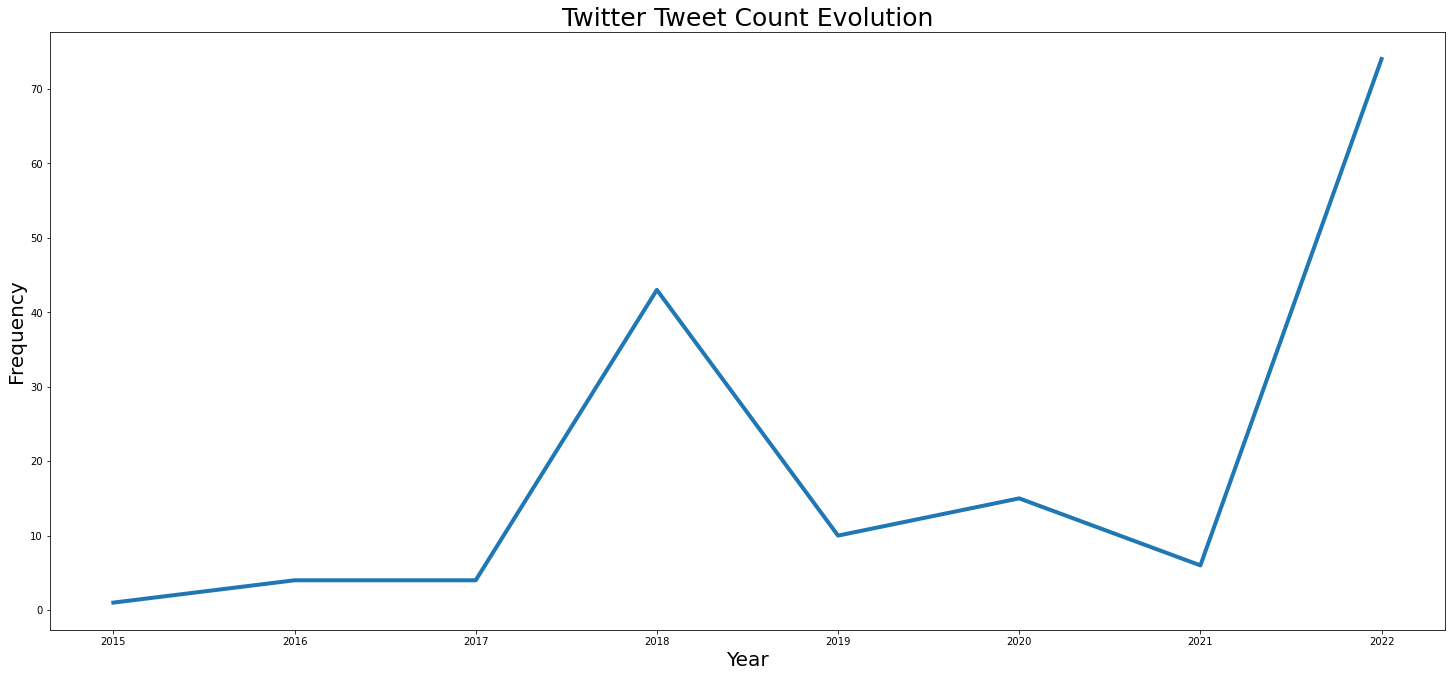

In [53]:
# Plot the number of tweets for Twitter by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_twitter_df, x= "Date", y= "Tweet", lw=4)
plt.title("Twitter Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

In [54]:
# # Get Popularity Information - to be looked by Shreha
# popularity = ["likes_count", "retweets_count", "replies_count"]
# popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
#                                                                     popularity[1] : 'sum',
#                                                                     popularity[2] : 'sum',
#                                                                     'tweet' : 'count'}).reset_index()
# popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
# popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
# popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]

# Database population - Prepare Data for storing in Database and append records

In [55]:
df_doge['financeType']='doge'
df_tesla['financeType']='tesla'
df_twitter['financeType']='twitter'


In [56]:
df_tweet_tostore = pd.concat([df_doge, df_tesla, df_twitter],axis=0,ignore_index=False)

In [57]:
 df_tweet_tostore.rename(columns = {'id':'tweetID','Date':'date','Tweet':'fullText','nlikes':'likesCount','nreplies':'replyCount','nretweets':'retweetCount'}, inplace = True)

In [58]:
 df_tweet_tostore

,date,fullText,tweetID,likesCount,replyCount,retweetCount,financeType
0,2019-04-02,Dogecoin value may vary,1113178951403180032,20160.0,1080.0,1959.0,doge
1,2019-04-02,Dogecoin rulz,1113173498384441344,138893.0,1732.0,16539.0,doge
2,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,1113009339743100929,9063.0,558.0,2428.0,doge
3,2020-04-25,Dogecoin Mode,1254039929333649409,2192.0,124.0,207.0,doge
4,2020-07-17,"Excuse me, I only sell Doge!",1284290215561986048,15930.0,416.0,775.0,doge
...,...,...,...,...,...,...,...
152,2022-05-31,My kids wrote better code when they were 12 than the nonsense script Jackson sent me. Like I sai...,1531632887866576904,7498.0,NaN,NaN,twitter
153,2022-06-09,Only Twitter,1534938078279880706,57122.0,NaN,NaN,twitter
154,2022-06-18,To answer the question: Why Twitter?,1538208757905297409,47711.0,NaN,NaN,twitter
155,2022-06-21,Twitter me &amp; real-life me are quite different haha!,1539292625433501702,147001.0,NaN,NaN,twitter


In [59]:
# need to fix this reindexing and dataloss issue
df_tweet_tostore= df_tweet_tostore[["tweetID","financeType","date","fullText","replyCount","likesCount","retweetCount"]]
df_tweet_tostore

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount
0,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160.0,1959.0
1,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893.0,16539.0
2,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,558.0,9063.0,2428.0
3,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192.0,207.0
4,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930.0,775.0
...,...,...,...,...,...,...,...
152,1531632887866576904,twitter,2022-05-31,My kids wrote better code when they were 12 than the nonsense script Jackson sent me. Like I sai...,NaN,7498.0,NaN
153,1534938078279880706,twitter,2022-06-09,Only Twitter,NaN,57122.0,NaN
154,1538208757905297409,twitter,2022-06-18,To answer the question: Why Twitter?,NaN,47711.0,NaN
155,1539292625433501702,twitter,2022-06-21,Twitter me &amp; real-life me are quite different haha!,NaN,147001.0,NaN


In [60]:
df_tweet_tostore['tweetID'].value_counts()

1022430321696858113    6
1498858611241635843    4
1499909806504779779    3
1050809258659344384    2
980569082838700033     2
                      ..
1103765550461681664    1
1103017584188780544    1
1102345986117033984    1
1102332191462195201    1
1544719143387238403    1
Name: tweetID, Length: 1499, dtype: int64

In [61]:
duplicates = df_tweet_tostore['tweetID'].value_counts()[(df_tweet_tostore['tweetID'].value_counts()>1)].index.to_list()
duplicates

['1022430321696858113',
 '1498858611241635843',
 '1499909806504779779',
 '1050809258659344384',
 '980569082838700033',
 '980566116614291456',
 '980566103356194816',
 '980566101124722688',
 '976766094630305792',
 '971466308855332864',
 '967238527418167296',
 '949831212326993920',
 '1049324111367815169',
 '1049716203676037122',
 '1050529142565941248',
 '1050788043907448834',
 '1051591623069429760',
 '980876926830039041',
 '1051876453837561857',
 '1051727134593445888',
 '1051973443602735104',
 '1052130883585507328',
 '1052356093534302208',
 '1052618041513586688',
 '1053128497747582976',
 '1053060766771761152',
 '1053063107843514368',
 '1053065745897148416',
 '1054496095819116544',
 '1054812318096216064',
 '1054801685791436800',
 '1055592321654243328',
 '980883549074018304',
 '1000456410944061440',
 '1056001102385049601',
 '995028864672788480',
 '998084314200862720',
 '998085901069598720',
 '998083368066543616',
 '998088849636016128',
 '998082149356994560',
 '998400110156550144',
 '9983695

In [62]:
for tweet_id in duplicates:
    
    duplicate_df = df_tweet_tostore[(df_tweet_tostore['tweetID'] == tweet_id)]
    max_reply_Count = duplicate_df["replyCount"].max()
    max_likes_Count = duplicate_df["likesCount"].max()
    max_retweet_Count = duplicate_df["retweetCount"].max()
    print(duplicate_df)
    
    for index in duplicate_df.index:
        df_tweet_tostore["replyCount"][index] = max_reply_Count
        df_tweet_tostore["likesCount"][index] = max_likes_Count
        df_tweet_tostore["retweetCount"][index] = max_retweet_Count
        

                 tweetID financeType       date  \
553  1022430321696858113       tesla 2018-07-26   
554  1022430321696858113       tesla 2018-07-26   
555  1022430321696858113       tesla 2018-07-26   
27   1022430321696858113     twitter 2018-07-26   
28   1022430321696858113     twitter 2018-07-26   
29   1022430321696858113     twitter 2018-07-26   

                                                                                                fullText  \
553  Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
554  Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
555  Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
27   Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
28   Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from .

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                tweetID financeType       date  \
309  971466308855332864       tesla 2018-03-07   
310  971466308855332864       tesla 2018-03-07   

                                                                                             fullText  \
309  First production cargo trip of the Tesla Semi heavy duty truck, carrying battery packs from the…   
310  First production cargo trip of the Tesla Semi heavy duty truck, carrying battery packs from the…   

     replyCount  likesCount  retweetCount  
309       864.0     31287.0        4045.0  
310       869.0     31485.0        4081.0  
                tweetID financeType       date  \
307  967238527418167296       tesla 2018-02-23   
308  967238527418167296       tesla 2018-02-23   

                                                                                                fullText  \
307  Am feeling optimistic about beating the Semi specs announced at the unveiling for the same price...   
308  Am feeling optimistic about b

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
665  1052130883585507328       tesla 2018-10-16   
666  1052130883585507328       tesla 2018-10-16   

                                                   fullText  replyCount  \
665  The FSD upgrade is the Tesla computer with our NN chip        36.0   
666  The FSD upgrade is the Tesla computer with our NN chip        36.0   

     likesCount  retweetCount  
665       670.0          43.0  
666       676.0          43.0  
                 tweetID financeType       date  \
667  1052356093534302208       tesla 2018-10-16   
668  1052356093534302208       tesla 2018-10-16   

                                                                                                fullText  \
667  Just reviewed Tesla’s service locations in North America &amp; realized we have major gaps in ge...   
668  Just reviewed Tesla’s service locations in North America &amp; realized we have major gaps in ge...   

     replyCount  likesCount  retweetCount  
6

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi


                 tweetID financeType       date  \
689  1056001102385049601       tesla 2018-10-26   
691  1056001102385049601       tesla 2018-10-26   

                                                                               fullText  \
689  Tesla Autopilot Drive on Navigation going to wide release in North America tonight   
691  Tesla Autopilot Drive on Navigation going to wide release in North America tonight   

     replyCount  likesCount  retweetCount  
689      1505.0     47349.0        3465.0  
691      1491.0     46908.0        3421.0  
                tweetID financeType       date  \
355  995028864672788480       tesla 2018-05-11   
360  995028864672788480       tesla 2018-05-11   

                                                                                                fullText  \
355  Our giant auto co competitors have much greater access to incentives than Tesla, which means Tes...   
360  Our giant auto co competitors have much greater access to incentive

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

                tweetID financeType       date  \
361  996131586469842945       tesla 2018-05-14   
364  996131586469842945       tesla 2018-05-14   

                                                                                                fullText  \
361  It’s super messed up that a Tesla crash resulting in a broken ankle is front page news and the ~...   
364  It’s super messed up that a Tesla crash resulting in a broken ankle is front page news and the ~...   

     replyCount  likesCount  retweetCount  
361      3858.0    102255.0       21056.0  
364      3902.0    103098.0       21333.0  
                tweetID financeType       date  \
357  995061978140819456       tesla 2018-05-11   
358  995061978140819456       tesla 2018-05-11   

                                                                                                fullText  \
357  That article was pushed as propaganda to counter IMF study showing fossil fuel subsidies to be $...   
358  That article was pus

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v


                tweetID financeType       date  \
337  986746909153869824       tesla 2018-04-18   
338  986746909153869824       tesla 2018-04-18   

                                                                                                fullText  \
337  Tesla batteries are currently live &amp; delivering power at 662 locations in Puerto Rico. Team ...   
338  Tesla batteries are currently live &amp; delivering power at 662 locations in Puerto Rico. Team ...   

     replyCount  likesCount  retweetCount  
337      2012.0    147700.0       31453.0  
338      1996.0    146545.0       31134.0  
                tweetID financeType       date  \
335  985361761271406594       tesla 2018-04-14   
336  985361761271406594       tesla 2018-04-14   

                                             fullText  replyCount  likesCount  \
335  Interview and Tesla factory tour with Gayle King       776.0     20568.0   
336  Interview and Tesla factory tour with Gayle King       769.0     20411.0 

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
759  1071846591693090816       tesla 2018-12-09   
760  1071846591693090816       tesla 2018-12-09   

                                                                                                fullText  \
759  Full self-driving option is required with the Tesla designed hardware 3 computer. This is a simp...   
760  Full self-driving option is required with the Tesla designed hardware 3 computer. This is a simp...   

     replyCount  likesCount  retweetCount  
759        81.0      1223.0          89.0  
760        80.0      1219.0          88.0  
                 tweetID financeType       date  \
761  1072466999249420288       tesla 2018-12-11   
762  1072466999249420288       tesla 2018-12-11   

                                                                                                fullText  \
761  We’re opening a lot of Tesla service centers next year, including Knoxville. Tesla will post upc...   
762  We’re opening 

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
778  1075227467239940096       tesla 2018-12-18   
781  1075227467239940096       tesla 2018-12-18   

                                                                                                fullText  \
778  Tesla in tunnel with retractable wheel gear that turns a car into a rail-guided train &amp; back...   
781  Tesla in tunnel with retractable wheel gear that turns a car into a rail-guided train &amp; back...   

     replyCount  likesCount  retweetCount  
778      1470.0     55820.0        8163.0  
781      1480.0     56270.0        8245.0  
                 tweetID financeType       date  \
783  1075561530081521664       tesla 2018-12-19   
785  1075561530081521664       tesla 2018-12-19   

                                                                fullText  \
783  As a thank you to Tesla short sellers, we named a 💨 after them haha   
785  As a thank you to Tesla short sellers, we named a 💨 after them haha   

     r

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

                 tweetID financeType       date  \
794  1078014421446799360       tesla 2018-12-26   
800  1078014421446799360       tesla 2018-12-26   

                                                                                                fullText  \
794  Most people don’t know that the Tesla Supercharger network allows easy long distance travel thro...   
800  Most people don’t know that the Tesla Supercharger network allows easy long distance travel thro...   

     replyCount  likesCount  retweetCount  
794       978.0     14922.0        1284.0  
800       971.0     14784.0        1268.0  
                 tweetID financeType       date  \
795  1078000436697677824       tesla 2018-12-26   
798  1078000436697677824       tesla 2018-12-26   

                                                                                                fullText  \
795  Reminder to US buyers that the $7500 tax credit cuts in half in 5 days! Order online at to see i...   
798  Reminder to US

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
695  1057690425710891009       tesla 2018-10-31   
697  1057690425710891009       tesla 2018-10-31   

                                                                                                fullText  \
695  For those unfamiliar, this uses Tesla Autopark/Summon. Slightly smarter version hopefully ready ...   
697  For those unfamiliar, this uses Tesla Autopark/Summon. Slightly smarter version hopefully ready ...   

     replyCount  likesCount  retweetCount  
695       547.0     29581.0        3169.0  
697       559.0     29855.0        3210.0  
                 tweetID financeType       date  \
696  1057871356367269888       tesla 2018-10-31   
698  1057871356367269888       tesla 2018-10-31   

                                                                                                fullText  \
696  Tesla advanced Summon ready in ~6 weeks! Just an over-the-air software upgrade, so will work on ...   
698  Tesla advanced

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
717  1063859100360962049       tesla 2018-11-17   
718  1063859100360962049       tesla 2018-11-17   

                                                                                                fullText  \
717  It will alert Tesla service automatically as fan power required to achieve target pressure drop ...   
718  It will alert Tesla service automatically as fan power required to achieve target pressure drop ...   

     replyCount  likesCount  retweetCount  
717        33.0      1335.0          54.0  
718        33.0      1328.0          54.0  
                 tweetID financeType       date  \
719  1064533933197471746       tesla 2018-11-19   
729  1064533933197471746       tesla 2018-11-19   

                                                                  fullText  \
719  Tesla can provide heating/cooling/lights/music for days using battery   
729  Tesla can provide heating/cooling/lights/music for days using battery   



C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

                 tweetID financeType       date  \
739  1068582126306582528       tesla 2018-11-30   
740  1068582126306582528       tesla 2018-11-30   

                                                        fullText  replyCount  \
739  Your Tesla can function as a boat for brief periods of time       290.0   
740  Your Tesla can function as a boat for brief periods of time       284.0   

     likesCount  retweetCount  
739      7493.0         820.0  
740      7412.0         808.0  
                 tweetID financeType       date  \
741  1068970017436262400       tesla 2018-12-01   
742  1068970017436262400       tesla 2018-12-01   

                                                                                                fullText  \
741  Perhaps most telling is that Norway, which is partly above the Arctic Circle, has more Teslas pe...   
742  Perhaps most telling is that Norway, which is partly above the Arctic Circle, has more Teslas pe...   

     replyCount  likesCount  r

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
574  1026872652290379776       tesla 2018-08-07   
576  1026872652290379776       tesla 2018-08-07   

                                                          fullText  \
574  Am considering taking Tesla private at $420. Funding secured.   
576  Am considering taking Tesla private at $420. Funding secured.   

     replyCount  likesCount  retweetCount  
574      5918.0     85163.0       14868.0  
576      5944.0     85661.0       15008.0  
                 tweetID financeType       date  \
568  1026203526332989441       tesla 2018-08-05   
571  1026203526332989441       tesla 2018-08-05   

                                                                                                fullText  \
568  Games &amp; other refinements will go to all Tesla S, X &amp; 3 from start of production. Autopi...   
571  Games &amp; other refinements will go to all Tesla S, X &amp; 3 from start of production. Autopi...   

     replyCount  likesCo

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

                 tweetID financeType       date  \
543  1017333757077008385       tesla 2018-07-12   
544  1017333757077008385       tesla 2018-07-12   

                                                                                                fullText  \
543  Just finished an amazing 3 day visit to China. The world has never seen human energy &amp; vigor...   
544  Just finished an amazing 3 day visit to China. The world has never seen human energy &amp; vigor...   

     replyCount  likesCount  retweetCount  
543      1092.0     37913.0        2492.0  
544      1087.0     37647.0        2464.0  
                 tweetID financeType       date  \
577  1026892550337122304       tesla 2018-08-07   
579  1026892550337122304       tesla 2018-08-07   

                                                                                                fullText  \
577  Absolutely. Am super appreciative of Tesla shareholders. Will ensure their prosperity in any sce...   
579  Absolutely. Am

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v


                 tweetID financeType       date  \
514  1011672532838055937       tesla 2018-06-26   
518  1011672532838055937       tesla 2018-06-26   

                                                                                                fullText  \
514  What would you love to see in a Tesla pickup truck? I have a few things in mind, but what do you...   
518  What would you love to see in a Tesla pickup truck? I have a few things in mind, but what do you...   

     replyCount  likesCount  retweetCount  
514     24940.0     50106.0        4376.0  
518     24706.0     49663.0        4338.0  
                 tweetID financeType       date  \
575  1026890900885184514       tesla 2018-08-07   
578  1026890900885184514       tesla 2018-08-07   

                                                                                                fullText  \
575  My hope is *all* current investors remain with Tesla even if we’re private. Would create special...   
578  My hope is *a

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

                 tweetID financeType       date  \
625  1042832003937099776       tesla 2018-09-20   
626  1042832003937099776       tesla 2018-09-20   

                                                                                           fullText  \
625  Tesla piece on the physics of car safety coming soon for those interested in technical details   
626  Tesla piece on the physics of car safety coming soon for those interested in technical details   

     replyCount  likesCount  retweetCount  
625       389.0     13030.0         688.0  
626       387.0     12922.0         680.0  
                 tweetID financeType       date        fullText  replyCount  \
623  1042525568531480576       tesla 2018-09-19  Tesla Rangers!       113.0   
624  1042525568531480576       tesla 2018-09-19  Tesla Rangers!       112.0   

     likesCount  retweetCount  
623      4491.0          93.0  
624      4460.0          92.0  
                 tweetID financeType       date  \
620  10418262601151

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi


                 tweetID financeType       date  \
599  1033260379147620352       tesla 2018-08-25   
601  1033260379147620352       tesla 2018-08-25   

                                                                                                fullText  \
599  What’s cool is that it was driven across the country alone (no escort or any accompanying vehicl...   
601  What’s cool is that it was driven across the country alone (no escort or any accompanying vehicl...   

     replyCount  likesCount  retweetCount  
599       196.0      8696.0         572.0  
601       192.0      8631.0         569.0  
                 tweetID financeType       date  \
598  1033494277643481089       tesla 2018-08-25   
600  1033494277643481089       tesla 2018-08-25   

                                                                                                fullText  \
598  This is utterly false. Fossil fuel merchants of doubt have been pushing that bs for years. Tesla...   
600  This is utter

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
511  1011846284351717379       tesla 2018-06-26   
520  1011846284351717379       tesla 2018-06-26   

                                                   fullText  replyCount  \
511  All Tesla vehicles come with cabin overheat protection        62.0   
520  All Tesla vehicles come with cabin overheat protection        61.0   

     likesCount  retweetCount  
511      1835.0         197.0  
520      1827.0         197.0  
                 tweetID financeType       date  \
419  1000204113953439744       tesla 2018-05-25   
421  1000204113953439744       tesla 2018-05-25   

                                                           fullText  \
419  Global map of Tesla Superchargers, including those coming soon   
421  Global map of Tesla Superchargers, including those coming soon   

     replyCount  likesCount  retweetCount  
419      2391.0     21663.0        2425.0  
421      2377.0     21474.0        2402.0  
                 tweetID

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

                 tweetID financeType       date  \
424  1000431923502530560       tesla 2018-05-26   
430  1000431923502530560       tesla 2018-05-26   

                                                                                                fullText  \
424  Generally higher quality reporting, especially if not under pressure to publish fast. Consumer R...   
430  Generally higher quality reporting, especially if not under pressure to publish fast. Consumer R...   

     replyCount  likesCount  retweetCount  
424        51.0      1589.0          67.0  
430        54.0      1598.0          68.0  
                 tweetID financeType       date  \
423  1000332404618227712       tesla 2018-05-26   
431  1000332404618227712       tesla 2018-05-26   

                                                                         fullText  \
423  Can’t believe someone leaked this schematic of the Tesla production system!!   
431  Can’t believe someone leaked this schematic of the Tesla pro

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                tweetID financeType       date  \
397  998988641702526977       tesla 2018-05-22   
401  998988641702526977       tesla 2018-05-22   

                                                                                                fullText  \
397  We’re going to include some fun games as hidden Easter eggs in Tesla S, X &amp; 3. What do you t...   
401  We’re going to include some fun games as hidden Easter eggs in Tesla S, X &amp; 3. What do you t...   

     replyCount  likesCount  retweetCount  
397     12682.0     38275.0        2383.0  
401     12592.0     37968.0        2356.0  
                tweetID financeType       date  \
396  998996397570441216       tesla 2018-05-22   
402  998996397570441216       tesla 2018-05-22   

                                                                                                fullText  \
396  In theory true, but not how UAW behaved. They drove GM &amp; Chrysler to bankruptcy &amp; lost 2...   
402  In theory true, but 

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
501  1010619095421616128       tesla 2018-06-23   
503  1010619095421616128       tesla 2018-06-23   

                                                                                                fullText  \
501  Expanding the tour soon. So many cool things to see. Tesla car factory has 3rd largest footprint...   
503  Expanding the tour soon. So many cool things to see. Tesla car factory has 3rd largest footprint...   

     replyCount  likesCount  retweetCount  
501        84.0      2288.0          84.0  
503        84.0      2299.0          84.0  
                 tweetID financeType       date  \
499  1010223743287771136       tesla 2018-06-22   
500  1010223743287771136       tesla 2018-06-22   

                                                                                                fullText  \
499  Was thinking of offering an extended Tesla factory tour option where you could help build part o...   
500  Was thinking o

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

                 tweetID financeType       date  \
472  1008397942653218816       tesla 2018-06-17   
483  1008397942653218816       tesla 2018-06-17   

                                                                                                fullText  \
472  UAW doesn’t have 30% of signatures (about 6000 people) needed for a vote. They can’t even muster...   
483  UAW doesn’t have 30% of signatures (about 6000 people) needed for a vote. They can’t even muster...   

     replyCount  likesCount  retweetCount  
472        33.0       547.0          29.0  
483        33.0       543.0          29.0  
                 tweetID financeType       date  \
471  1008401637528895488       tesla 2018-06-17   
482  1008401637528895488       tesla 2018-06-17   

                                                                                                fullText  \
471  I endorse freedom to form a union too, as well as freedom not to do so if they feel Tesla is a g...   
482  I endorse free

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

                 tweetID financeType       date  \
639  1047005194180022273       tesla 2018-10-02   
640  1047005194180022273       tesla 2018-10-02   

                                                                                                fullText  \
639  Tesla Autopilot team is awesome! Got to make sure we iron out the details though. Long tail of t...   
640  Tesla Autopilot team is awesome! Got to make sure we iron out the details though. Long tail of t...   

     replyCount  likesCount  retweetCount  
639        73.0      1343.0          94.0  
640        73.0      1334.0          94.0  
                  tweetID financeType       date  \
1443  1477700424933253123       tesla 2022-01-01   
1444  1477700424933253123       tesla 2022-01-01   

                                 fullText  replyCount  likesCount  \
1443  Great work by Tesla team worldwide!      5630.0     66400.0   
1444  Great work by Tesla team worldwide!      5630.0     66405.0   

      retweetCount  
144

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                  tweetID financeType       date  \
1453  1487121182155550725       tesla 2022-01-27   
1457  1487121182155550725       tesla 2022-01-27   

                                                     fullText  replyCount  \
1453  Tesla will support FSD licensing by other manufacturers       528.0   
1457  Tesla will support FSD licensing by other manufacturers       528.0   

      likesCount  retweetCount  
1453      6738.0         716.0  
1457      6737.0         716.0  
                  tweetID financeType       date  \
1454  1486880325871587329       tesla 2022-01-27   
1456  1486880325871587329       tesla 2022-01-27   

                                                                                                 fullText  \
1454  Given how hard insanely FSD is, I think it may take 5 years or more before any company besides T...   
1456  Given how hard insanely FSD is, I think it may take 5 years or more before any company besides T...   

      replyCount  likesCoun

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v


                 tweetID financeType       date  \
893  1120831425169674240       tesla 2019-04-23   
904  1120831425169674240       tesla 2019-04-23   

                                                   fullText  replyCount  \
893  Tesla is going to develop a quiet, electric leafblower      9612.0   
904  Tesla is going to develop a quiet, electric leafblower      9612.0   

     likesCount  retweetCount  
893    294414.0       22868.0  
904    294415.0       22868.0  
                  tweetID financeType       date  \
65    1481873421390680065        doge 2022-01-13   
1448  1481873421390680065       tesla 2022-01-13   

                               fullText  replyCount  likesCount  retweetCount  
65    Tesla merch buyable with Dogecoin     38725.0    332825.0       51727.0  
1448  Tesla merch buyable with Dogecoin     38725.0    332825.0       51727.0  
                tweetID financeType       date  \
66  1485953263040188416        doge 2022-01-24   
67  1485953263040188416   

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                tweetID financeType       date  \
40  1055999003299471360     twitter 2018-10-26   
45  1055999003299471360     twitter 2018-10-26   

                                                                           fullText  \
40  On Insta, 10% of followers like even lame posts. On Twitter, good posts get 1%.   
45  On Insta, 10% of followers like even lame posts. On Twitter, good posts get 1%.   

    replyCount  likesCount  retweetCount  
40       954.0     23338.0        2666.0  
45        77.0      2079.0          79.0  
               tweetID financeType       date  \
13  999848310344044544     twitter 2018-05-24   
14  999848310344044544     twitter 2018-05-24   

                                                                                               fullText  \
13  Definitely did not. I’ve been through many press cycles &amp; know full well same person praisin...   
14  Definitely did not. I’ve been through many press cycles &amp; know full well same person pra

C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi


                tweetID financeType       date            fullText  \
38  1055585815718322178     twitter 2018-10-25  My twitter feed rn   
39  1055585815718322178     twitter 2018-10-25  My twitter feed rn   

    replyCount  likesCount  retweetCount  
38      1008.0     76197.0        6153.0  
39       991.0     75379.0        6068.0  


C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_25084/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [63]:
df_tweet_tostore[df_tweet_tostore.duplicated()]

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount
67,1485953263040188416,doge,2022-01-24,I will eat a happy meal on tv if accepts Dogecoin,31009.0,422498.0,59390.0
245,831972613912080384,tesla,2017-02-15,"In appreciation, Tesla is providing all repair costs free of charge and expedited.",809.0,47538.0,13820.0
306,949831212326993920,tesla,2018-01-06,"Gonna put an old school drive-in, roller skates &amp; rock restaurant at one of the new Tesla Su...",4295.0,172818.0,15550.0
308,967238527418167296,tesla,2018-02-23,Am feeling optimistic about beating the Semi specs announced at the unveiling for the same price...,355.0,15288.0,942.0
310,971466308855332864,tesla,2018-03-07,"First production cargo trip of the Tesla Semi heavy duty truck, carrying battery packs from the…",869.0,31485.0,4081.0
...,...,...,...,...,...,...,...
51,1059968605616594944,twitter,2018-11-06,"I think Twitter is deleting fake, scam or maybe even inactive accounts. My follower count decrea...",4429.0,113840.0,4658.0
57,1119093220544147457,twitter,2019-04-18,My Twitter is pretty much complete nonsense at this point,6066.0,368095.0,60904.0
84,1484456594775678976,twitter,2022-01-20,Twitter is spending engineering resources on this bs while crypto scammers are throwing a spambo...,7983.0,149078.0,10037.0
86,1498940416053420037,twitter,2022-03-01,🤣🤣 That was me tweeting from when someone else had snatched my name. I was actually one of the e...,1182.0,25779.0,983.0


In [64]:
df_tweet_tostore = df_tweet_tostore.drop_duplicates()
df_tweet_tostore

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount
0,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160.0,1959.0
1,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893.0,16539.0
2,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,558.0,9063.0,2428.0
3,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192.0,207.0
4,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930.0,775.0
...,...,...,...,...,...,...,...
152,1531632887866576904,twitter,2022-05-31,My kids wrote better code when they were 12 than the nonsense script Jackson sent me. Like I sai...,NaN,7498.0,NaN
153,1534938078279880706,twitter,2022-06-09,Only Twitter,NaN,57122.0,NaN
154,1538208757905297409,twitter,2022-06-18,To answer the question: Why Twitter?,NaN,47711.0,NaN
155,1539292625433501702,twitter,2022-06-21,Twitter me &amp; real-life me are quite different haha!,NaN,147001.0,NaN


In [65]:
df_tweet_tostore['tweetID'].value_counts()

1395437522306490371    2
1481873421390680065    2
1452348126753349640    2
1454808104256737289    2
1022430321696858113    2
                      ..
1020479409805877248    1
1017963227261624321    1
1017333757077008385    1
1017054281638113280    1
1544719143387238403    1
Name: tweetID, Length: 1499, dtype: int64

In [66]:
duplicates2 = df_tweet_tostore['tweetID'].value_counts()[(df_tweet_tostore['tweetID'].value_counts()>1)].index.to_list()
duplicates2

['1395437522306490371',
 '1481873421390680065',
 '1452348126753349640',
 '1454808104256737289',
 '1022430321696858113',
 '1530209049261658112',
 '1392030108274159619',
 '1498858611241635843',
 '1470703708677840896',
 '1527418023069503511']

In [67]:
for tweet_id in duplicates2:
    
    duplicate_df = df_tweet_tostore[(df_tweet_tostore['tweetID'] == tweet_id)]
    print(duplicate_df)
    

                  tweetID financeType       date  \
40    1395437522306490371        doge 2021-05-19   
1298  1395437522306490371       tesla 2021-05-19   

                                                                       fullText  \
40    A longtime Tesla supporter gave me the Doge dollar sticker at Giga Berlin   
1298  A longtime Tesla supporter gave me the Doge dollar sticker at Giga Berlin   

      replyCount  likesCount  retweetCount  
40         954.0     23338.0        2666.0  
1298       954.0     23338.0        2666.0  
                  tweetID financeType       date  \
65    1481873421390680065        doge 2022-01-13   
1448  1481873421390680065       tesla 2022-01-13   

                               fullText  replyCount  likesCount  retweetCount  
65    Tesla merch buyable with Dogecoin     38725.0    332825.0       51727.0  
1448  Tesla merch buyable with Dogecoin     38725.0    332825.0       51727.0  
                  tweetID financeType       date  \
55    145

In [68]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [69]:
# Save Tweet data

try:
    SqlConn.insertTweets(df_tweet_tostore)
    print("Data Transfer Done")
except BaseException as err:
    print(err)

Data Transfer Done
